# Etude des trajectoires

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re

In [2]:
def show(df, msg=""):
    plt.title("id_traj : %d %s" % (df.iloc[0]['id'], msg))
    plt.plot(df['X'], df['Y'], 'r')

    min_x = min(df['X'])
    max_x = max(df['X'])

    min_y = min(df['Y'])
    max_y = max(df['Y'])
    plt.axis([min_x - 20, max_x + 20, min_y - 20, max_y + 20])
    plt.plot(df['X'], df['Y'], 'b+')
    plt.tight_layout()
    return plt

In [3]:
file = open("Data/Example.txt", "r")
file.readline() # on ignore la première ligne
X, Y, id_traj_from_file = [], [], []
for line in file:
    data = re.split('\s', line)
    id_traj_from_file.append(int(data[0]))
    X.append(float(data[2]))
    Y.append(float(data[3]))
df = pd.DataFrame(
    {
        "id": id_traj_from_file,
        "X": X,
        "Y": Y
    }
)

## Observations
### Voici quelques trajectoires supposées juste :

In [4]:
df_ref = []
id_traj_good = [31, 32, 33, 35, 37, 48]
for i in id_traj_good:
    df_ref.append(df.loc[df['id']==i])

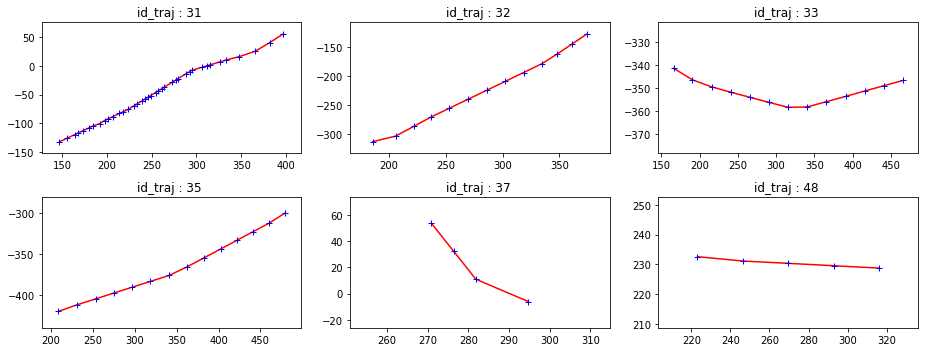

In [5]:
plt.figure(figsize=(13, 5))
for i in range(1, len(id_traj_good)+1):
    plt.subplot(2, 3, i)
    show(df_ref[i-1])

### Et voici celles supposées erronées :

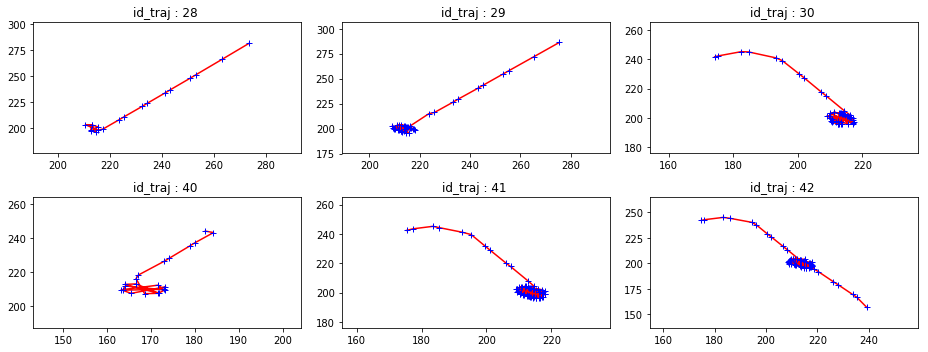

In [6]:
df_err = []
id_traj_bad = [28, 29, 30, 40, 41, 42]
for i in id_traj_bad:
    df_err.append(df.loc[df['id']==i])

plt.figure(figsize=(13, 5))
for i in range(1, len(id_traj_bad)+1):
    plt.subplot(2, 3, i)
    show(df_err[i-1])

### Remarques
Au vu des ces trajectoires erronées, nous pouvons observer une concentration importante de points a un endroit donné. Celle-ci révèle que la détection s'est male tournée.
Contrairement aux trajectoires justes, qui semblent avoir une courbe continue, c'est-à-dire sans perturbements.

### Hypothèses
L'idée ici est de comparer l'angle formé par deux vecteurs de points.
Pour cela nous allons utiliser le Produit Scalaire.

#### Petit rappel sur les produits scalaires
Soit deux vecteurs `A` et `b`, le produit scalaire de ceux deux vecteurs est :

$
\overrightarrow{A} \cdot \overrightarrow{B} = 
||\overrightarrow{A}|| * ||\overrightarrow{B}|| *
    \cos(
        \overrightarrow{A} , \overrightarrow{B}
    )
$

Soit
         
$
\cos(\overrightarrow{A},\overrightarrow{B}) = 
\dfrac
    {\overrightarrow{A} \cdot \overrightarrow{B}}
    {||\overrightarrow{A}|| \cdot ||\overrightarrow{B}||}
$

Soit

$
\angle\overrightarrow{A},\overrightarrow{B} =
\arccos
    \Bigg(
        \dfrac
            {\overrightarrow{A}\cdot \overrightarrow{B}}
            {||\overrightarrow{A}|| \cdot ||\overrightarrow{B}||}
    \Bigg)
$

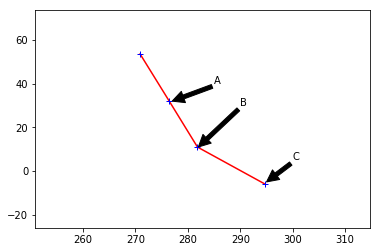

In [7]:
df_ex = df.loc[df['id']==37]

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(df_ex['X'], df_ex['Y'], 'r')

min_x = min(df_ex['X'])
max_x = max(df_ex['X'])
min_y = min(df_ex['Y'])
max_y = max(df_ex['Y'])
plt.axis([min_x - 20, max_x + 20, min_y - 20, max_y + 20])
plt.plot(df_ex['X'], df_ex['Y'], 'b+')
ax.annotate('A', xy=(277, 32), xytext=(285, 40),
                arrowprops=dict(facecolor='black'),
                )
ax.annotate('B', xy=(282, 11), xytext=(290, 30),
                arrowprops=dict(facecolor='black'),
                )
ax.annotate('C', xy=(295, -5), xytext=(300, 5),
                arrowprops=dict(facecolor='black'),
                )
plt.show()

En ayant les coordonnées A, B et C ci-dessus tels que

$
A = 
\begin{pmatrix}
281.83 \\ 
10.97
\end{pmatrix}
;
B = 
\begin{pmatrix}
276.38 \\
32.28
\end{pmatrix}
;
C = 
\begin{pmatrix}
270.89 \\
53.59
\end{pmatrix}
$

En utilisant la formule ci-dessus, on obtient l'angle $\angle ABC$ valant 157.14

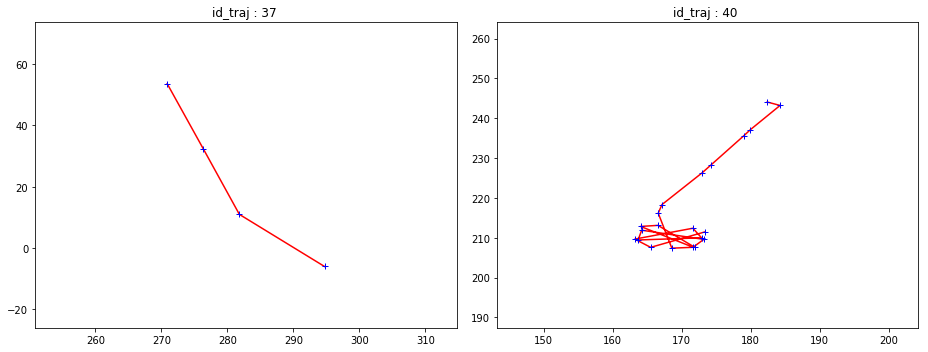

In [8]:
df_comp = []
df_comp.append(df.loc[df['id']==37])
df_comp.append(df.loc[df['id']==40])

plt.figure(figsize=(13, 5))
for i in range(1, 3):
    plt.subplot(1, 2, i)
    show(df_comp[i-1])

En observant ces deux trajectoires (celle de gauche supposée juste, celle de droite supposée erronée), nous pouvons observer que, étant donné que la zone erronée est représentée par des un ensemble de points concentrés de points autour d'une certaine région, ces points en question sont relativement "proches", c'est à dire qu'en calculant leur angle, nous devrions trouver un un angle relativement petit. Supposons que cet angle soit inférieur à 50° degré.
Testons notre hypothèse sur les trajectoires erronées vues précédemment.

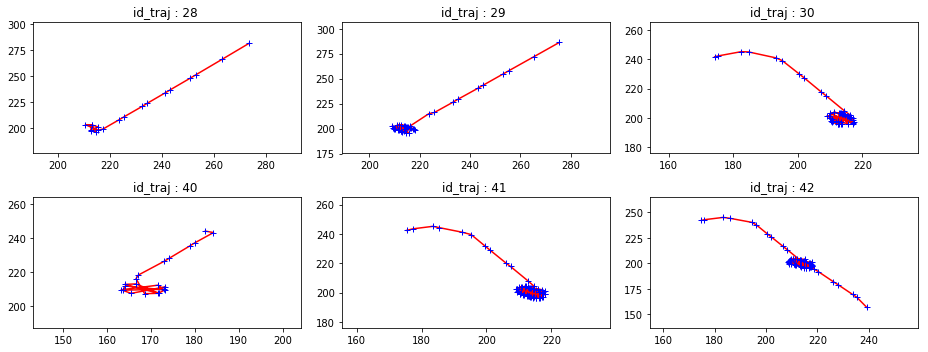

In [9]:
plt.figure(figsize=(13, 5))
for i in range(1, len(id_traj_bad)+1):
    plt.subplot(2, 3, i)
    show(df_err[i-1])

Voici la fonction permettant de calculer l'angle, dont les valeurs de x et y des vecteurs sont données en paramètres, renvoyant la valeur absolue de l'angle (pour rendre les choses plus simples).
Réalisons des tests simples.

In [10]:
import math
def get_angle_vectors(first_vector_x, first_vector_y, second_vector_x, second_vector_y):
    cross_product = first_vector_x * second_vector_x + first_vector_y * second_vector_y
    magnitude = math.sqrt(first_vector_x ** 2 + first_vector_y ** 2) * math.sqrt(
        (second_vector_x ** 2 + second_vector_y ** 2)
    )
    angle = math.degrees(math.acos(cross_product / magnitude))
    if angle < 0.0001: # causé par l'erreur de calcul de python
        angle = 0
    return angle if magnitude != 0 else 0

In [11]:
print(get_angle_vectors(1, 1, 1, 1))
print(get_angle_vectors(1, 0, 0, 1))
print(get_angle_vectors(0, 1, 1, 0))
print(get_angle_vectors(-1, 1, 1, 0))
print(get_angle_vectors(-1, 0, 1, 0))

0
90.0
90.0
135.0
180.0


### Test sur les jeux de données
Nous réaliserons nos tests sur les 10 premières trajectoires du jeu de données pour commencer, groupant celles qui sont erronées ensemble et le reste ensemble.

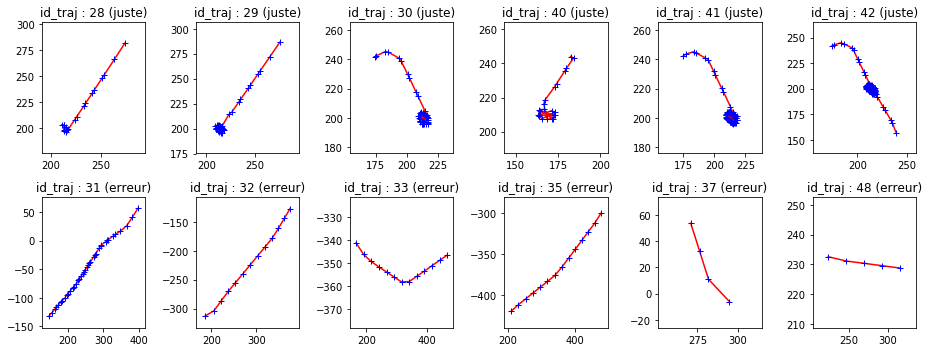

In [12]:
id_traj_test = id_traj_bad + id_traj_good

plt.figure(figsize=(13, 5))
for i in id_traj_test:
    count_error = 0
    df_test = df[df['id'] == i]
    for j in range(1, len(df_test) - 1):
        x_previous = df_test['X'].iloc[j - 1]
        x = df_test['X'].iloc[j]
        x_next = df_test['X'].iloc[j + 1]

        y_previous = df_test['Y'].iloc[j - 1]
        y = df_test['Y'].iloc[j]
        y_next = df_test['Y'].iloc[j + 1]

        first_vector_x = x_previous - x
        first_vector_y = y_previous - y
        second_vector_x = x_next - x
        second_vector_y = y_next - y

        angle = abs(get_angle_vectors(first_vector_x, first_vector_y, second_vector_x, second_vector_y))

        if angle < 50:
            count_error += 1

    plt.subplot(2, 6, id_traj_test.index(i) + 1)
    if count_error > 0:
        show(df_test, "(juste)")
    else:
        show(df_test, "(erreur)")